In [1]:
# Import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Read in buoy data and relevant variables
buoy_file = "C:/Users/rache/Documents/University of Southern California/2023-2024 Year 4/GEOL 599 Environmental data science/data/HW8_buoy_data.xlsx" #note on path
buoy_all = pd.read_excel(buoy_file)
buoy = buoy_all.loc[:,['WVHT','DPD','APD','MWD','WTMP']]
buoy = buoy.rename(columns={'WVHT':'height','DPD':'dom pd','APD':'avg pd','MWD':'dir','WTMP':'temp'})
buoy[(buoy['height']==99)|(buoy['dom pd']==99)|(buoy['avg pd']==99)|(buoy['dir']==99)|(buoy['temp']==99)] #See rows with no data
buoy= buoy.drop(buoy[buoy['height']==99].index)

In [3]:
# Print out column names
print(buoy.columns)

Index(['height', 'dom pd', 'avg pd', 'dir', 'temp'], dtype='object')


In [4]:
# Convert to numpy
buoy_np = buoy.to_numpy()

In [5]:
# Fit PCA to buoy data
pca = PCA(n_components=5)
pca.fit(buoy_np)

PCA(n_components=5)

In [6]:
# Explore PCA model
print(pca.explained_variance_ratio_)
print(pca.components_)

[9.90777521e-01 5.67156404e-03 2.48887556e-03 9.73144741e-04
 8.88946139e-05]
[[-0.00414966  0.03483275 -0.00632252 -0.99911854  0.02217264]
 [-0.02817253 -0.92292703 -0.35324348 -0.02653793  0.14807698]
 [ 0.03730158 -0.14552072 -0.03477188 -0.02692689 -0.98767311]
 [ 0.12786551 -0.35382026  0.92602029 -0.01817485  0.02485407]
 [ 0.99068062  0.02504633 -0.12828252 -0.00158002  0.03828429]]


In [13]:
buoy_plot = pca.transform(buoy_np)

In [14]:
# Turn plot data into dataframe
buoy_plot= pd.DataFrame({'Comp 1':buoy_plot[:,0], 'Comp 2':buoy_plot[:,1]})

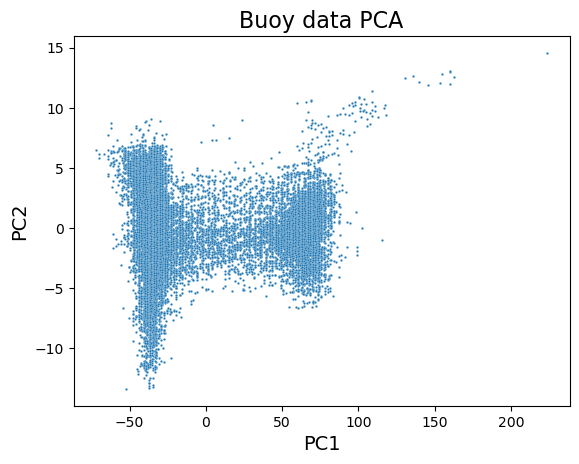

In [80]:
### 1.) Make PCA plot for PC1 vs. PC2
plot= sns.scatterplot(data=buoy_plot, x='Comp 1', y='Comp 2', s= 3)
plot.set_title("Buoy data PCA", fontsize= 16)
plot.set_xlabel("PC1", fontsize= 14)
plot.set_ylabel("PC2", fontsize= 14)
plt.show()

In [57]:
# Apply K means clustering on buoy PCA data for different numbers of clusters
kmeans1 = KMeans(n_clusters=1)
kmeans2 = KMeans(n_clusters=2)
kmeans3 = KMeans(n_clusters=3)
kmeans4 = KMeans(n_clusters=4)
kmeans5 = KMeans(n_clusters=5)
kmeans6 = KMeans(n_clusters=6)
kmeans7 = KMeans(n_clusters=7)
kmeans8 = KMeans(n_clusters=8)
kmeans9 = KMeans(n_clusters=9)
kmeans10 = KMeans(n_clusters=10)
kmeans1.fit(buoy_plot)
kmeans2.fit(buoy_plot)
kmeans3.fit(buoy_plot)
kmeans4.fit(buoy_plot)
kmeans5.fit(buoy_plot)
kmeans6.fit(buoy_plot)
kmeans7.fit(buoy_plot)
kmeans8.fit(buoy_plot)
kmeans9.fit(buoy_plot)
kmeans10.fit(buoy_plot)
buoy_kmeans= pd.DataFrame({'# of clusters': list(range(1,11)), 'Inertia': [kmeans1.inertia_,kmeans2.inertia_,kmeans3.inertia_,kmeans4.inertia_,kmeans5.inertia_,kmeans6.inertia_,kmeans7.inertia_,kmeans8.inertia_,kmeans9.inertia_,kmeans10.inertia_]})
buoy_kmeans['Inertia']= buoy_kmeans['Inertia'].round(0)

In [58]:
# Look at the buoy_kmeans dataframe
buoy_kmeans

,# of clusters,Inertia
0,1,37245307.0
1,2,3414598.0
2,3,1866176.0
3,4,1339167.0
4,5,1052785.0
5,6,843357.0
6,7,705755.0
7,8,617305.0
8,9,526471.0
9,10,450679.0


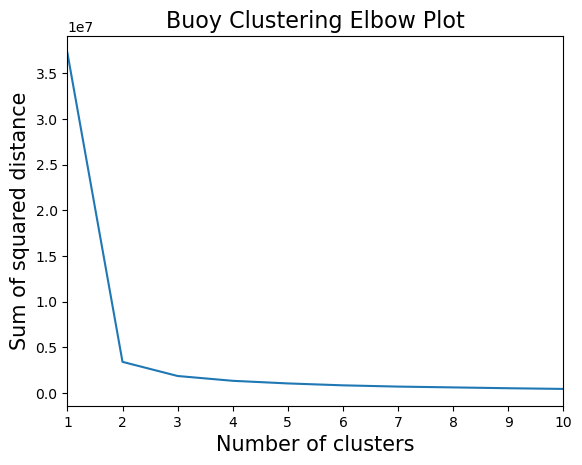

In [59]:
### 2.) Elbow plot- Plot number of clusters vs. error
Fig = sns.lineplot(data=buoy_kmeans, x='# of clusters', y='Inertia')
Fig.set_title("Buoy Clustering Elbow Plot", fontsize= 16)
Fig.set_xlabel("Number of clusters", fontsize= 15)
Fig.set_ylabel("Sum of squared distance", fontsize= 15)
Fig.set_xticks(range(1,11,1))
Fig.set_xlim(1,10)
plt.show()
### 3.) Based on the location of the "elbow" on the elbow plot, 2 clusters is the right choice.It is the smallest number of clusters needed to massively reduce the sum of squared distances between data points and their cluster centers.

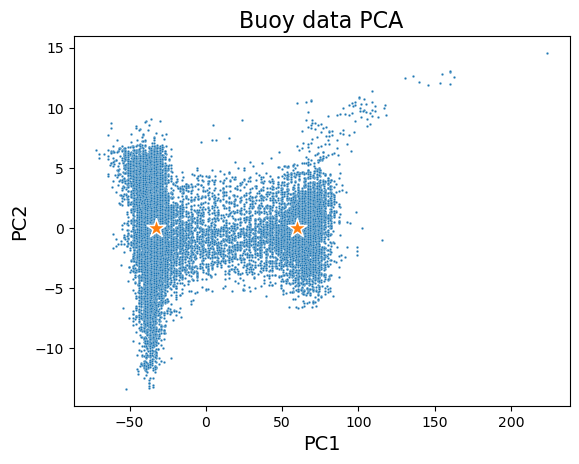

array([[ 5.94903618e+01,  2.04233903e-02],
       [-3.29170731e+01, -1.13006243e-02]])

In [79]:
### 4.) Plot PC1 vs. PC2 along with the 2 cluster centers.
plot= sns.scatterplot(data=buoy_plot, x='Comp 1', y='Comp 2', s= 3)
sns.scatterplot(data= pd.DataFrame(kmeans2.cluster_centers_), x= 0, y= 1, marker= '*', s= 200)
plot.set_title("Buoy data PCA", fontsize= 16)
plot.set_xlabel("PC1", fontsize= 14)
plot.set_ylabel("PC2", fontsize= 14)
plt.show()
### 5.) Based on just looking at the PCA plot, this clustering does make sense as visually, the PCA data does largely clump into 2 big clusters (indicated by the 2 orange star centers in the plot below).